# Polynomial Regression

In this notebook, we will explore polynomial regression using the car sales dataset hosted on IBM cloud object storage. The dataset has already been pre-cleaned.
## Objectives
* Apply polynomial transforms to data

In [3]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [59]:
def get_R2_features(model, test= True):
    features = list(X)
    features.remove("three")
    
    R_2_train = []
    R_2_test = []
    
    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [6]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv'
data = pd.read_csv(url)
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

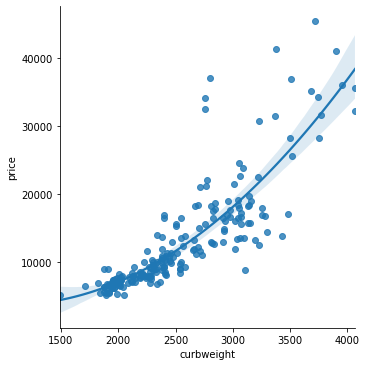

In [10]:
sns.lmplot(x= 'curbweight', y = 'price', data =data, order = 2)
plt.show()

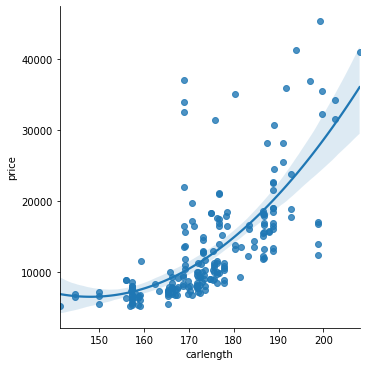

In [15]:
sns.lmplot(x = 'carlength', y = 'price', data = data, order = 2)

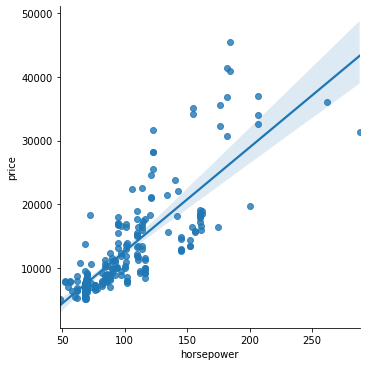

In [19]:
sns.lmplot(x = 'horsepower', y = 'price', data = data)

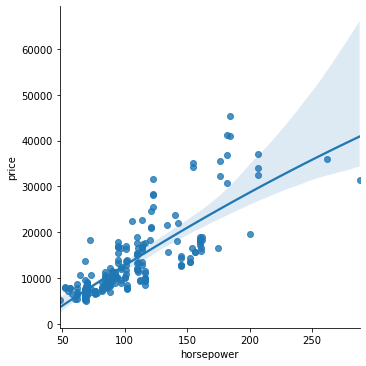

In [20]:
sns.lmplot(x = 'horsepower', y = 'price', data = data, order = 2)

Let's split the data into features and target variables

In [30]:
X = data.drop('price', axis = 1)
y = data.price

In [31]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)
print("Number of train samples:", X_train.shape[0])
print("Number of test samples:", X_test.shape[0])

Number of train samples: 143
Number of test samples: 62


In [32]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (143,)
Shape of y_test: (62,)


In [33]:
#create an instance of the linear regression
lm = LinearRegression()

In [34]:
#fit the model with the training set
lm.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = lm.predict(X_test)

In [38]:
print ("R^2 score of the training data ", lm.score(X_train,y_train))
print ("R^2 score of the testing data ", lm.score(X_test,y_test))

R^2 score of the training data  0.9260519911659063
R^2 score of the testing data  0.8488476500423834


In [41]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

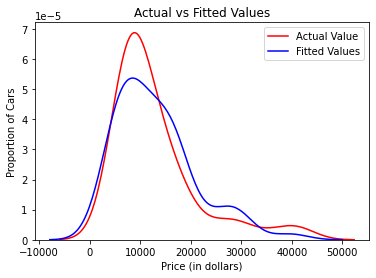

In [42]:
plot_dis(y_test,y_pred)

In [50]:
feature_coef= zip(X.columns, lm.coef_)
list(feature_coef)

[('diesel', 831913222608671.2),
 ('gas', 831913222607230.4),
 ('std', 265.817138671875),
 ('turbo', -264.91015625),
 ('convertible', 1772.9595489501953),
 ('hardtop', 3023.3792724609375),
 ('hatchback', -1723.89794921875),
 ('sedan', -619.0015869140625),
 ('wagon', -2452.8715209960938),
 ('4wd', -568.2215728759766),
 ('fwd', -232.0255126953125),
 ('rwd', 855.8648681640625),
 ('dohc', 2472.438751220703),
 ('dohcv', -13345.657196044922),
 ('l', 2227.9989013671875),
 ('ohc', 4688.209747314453),
 ('ohcf', 6033.189788818359),
 ('ohcv', -2810.8487548828125),
 ('rotor', 726.4886322021484),
 ('eight', 9304.24674987793),
 ('five', -2735.461212158203),
 ('four', -5352.745178222656),
 ('six', -2151.5219116210938),
 ('three', 0.0),
 ('twelve', 208.89024353027344),
 ('two', 726.4573822021484),
 ('wheelbase', 77.236328125),
 ('curbweight', 5.125),
 ('enginesize', 23.912109375),
 ('boreratio', -1786.1702728271484),
 ('horsepower', 69.234375),
 ('carlength', -63.23828125),
 ('carwidth', 575.8100585937

In [45]:
#let us view the coefficients for the linear regression model
{col:coef for col, coef in zip(X.columns, lm.coef_)}

{'diesel': 831913222608671.2,
 'gas': 831913222607230.4,
 'std': 265.817138671875,
 'turbo': -264.91015625,
 'convertible': 1772.9595489501953,
 'hardtop': 3023.3792724609375,
 'hatchback': -1723.89794921875,
 'sedan': -619.0015869140625,
 'wagon': -2452.8715209960938,
 '4wd': -568.2215728759766,
 'fwd': -232.0255126953125,
 'rwd': 855.8648681640625,
 'dohc': 2472.438751220703,
 'dohcv': -13345.657196044922,
 'l': 2227.9989013671875,
 'ohc': 4688.209747314453,
 'ohcf': 6033.189788818359,
 'ohcv': -2810.8487548828125,
 'rotor': 726.4886322021484,
 'eight': 9304.24674987793,
 'five': -2735.461212158203,
 'four': -5352.745178222656,
 'six': -2151.5219116210938,
 'three': 0.0,
 'twelve': 208.89024353027344,
 'two': 726.4573822021484,
 'wheelbase': 77.236328125,
 'curbweight': 5.125,
 'enginesize': 23.912109375,
 'boreratio': -1786.1702728271484,
 'horsepower': 69.234375,
 'carlength': -63.23828125,
 'carwidth': 575.81005859375,
 'citympg': -161.779296875,
 'highwaympg': 145.765625}

The first two coefficents are too large to plot so let us drop them and plot the remaining 

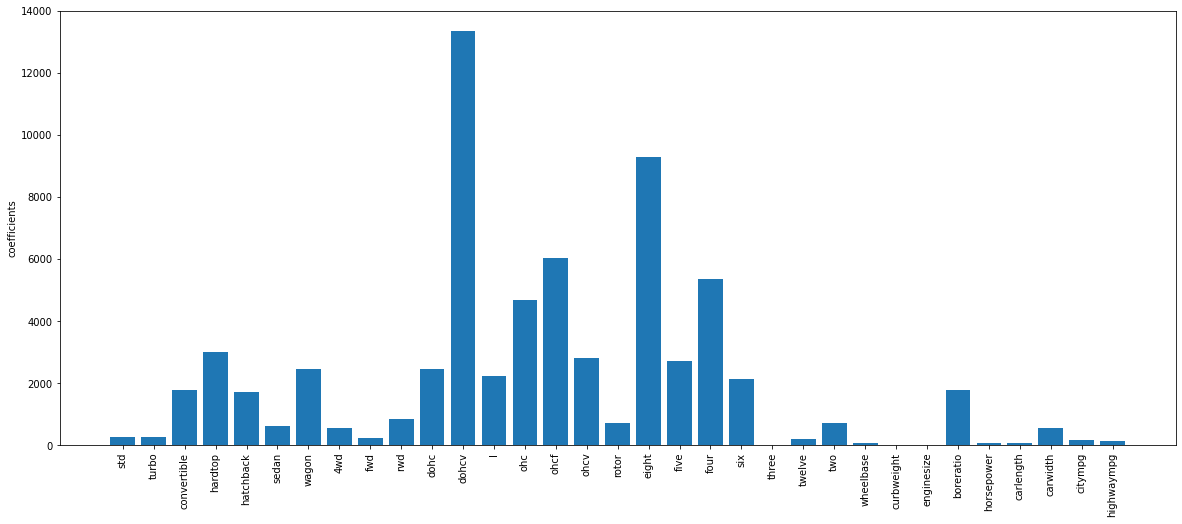

In [54]:
plt.figure(figsize = (20,8))
plt.bar(X.columns[2:],abs(lm.coef_[2:]))
plt.xticks(rotation = 90)
plt.ylabel("coefficients")
plt.show()

We can see that some of the features have more importance on the predictions. Let us look at the individual features and how they are affecting our predictions.

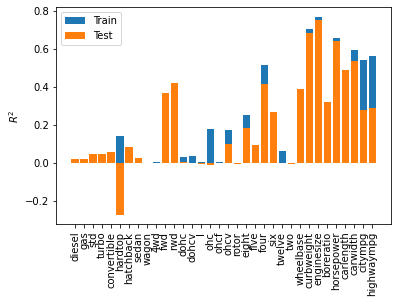

Training R^2 mean value 0.21817773426877915 Testing R^2 mean value 0.18241493035139267 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [60]:
get_R2_features(lm)

The impression given by the dist plot were totatly wrong. from the plot above, we can see that the smaller coefficients are very important in our predicitions. most contribute significantly to our predictions.

### Multiple Features

In [76]:
pf = PolynomialFeatures(degree=2, include_bias=False)

In [77]:
x_train_pr = pf.fit_transform(X_train)
x_test_pr = pf.fit_transform(X_test)

In [78]:
x_train_pr.shape

(143, 665)

In [79]:
x_train_pr.shape[1] - X_train.shape[1]

630

We have  transform our data to include new features. now we have 630 new features

In [80]:
lm = LinearRegression()
lm.fit(x_train_pr, y_train)

LinearRegression()

In [81]:
y_pred3 = lm.predict(x_test_pr)

In [82]:
print("R^2 on training data:", lm.score(x_train_pr, y_train))
print("R^2 on testing data:", lm.score(x_test_pr,y_test))

R^2 on training data: 0.9985318497975862
R^2 on testing data: -36729.95812278467


In [83]:
Input  = [('polynomial', PolynomialFeatures(degree = 2, include_bias = False)), ('model', LinearRegression())]

In [84]:
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [85]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.9985318497975862
R^2 on testing data: -36729.95812278467


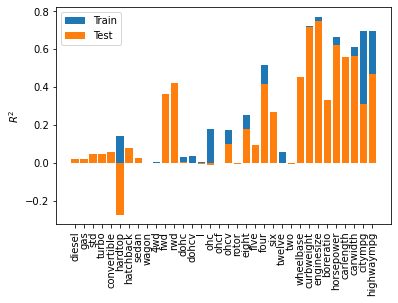

Training R^2 mean value 0.23079120882558718 Testing R^2 mean value 0.19390761379644175 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614307 


In [86]:
get_R2_features(pipe)